In [1]:
import copy

from neural_network import NNTrain, get_p
import nn_functions as nn
from nn_functions import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p

In [52]:
a = NNTrain(dx=0.1, bx=0.01, hidden_nodes=10, alpha=1e-5, batch_size=300, bc=1)

In [53]:
p=[]
p.append(copy.deepcopy(get_p(a)))
a.train(100)

In [ ]:
bc_multiplier = 5
thresh = 3e-5

for i in range(100000):
    p.append(copy.deepcopy(get_p(a)))
    if a.alpha < 1e-8  or a.bc > 1000:
        break
    if np.mean([np.abs(s-t) for s, t in zip(a.cost_rate[-21:], a.cost_rate[-20:])]) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

In [55]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('number of iterations', len(a.cost_rate))
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, dx=0.005))

alpha: 1e-05
BC: 1
number of iterations 23820
relative error: 0.869000835110442


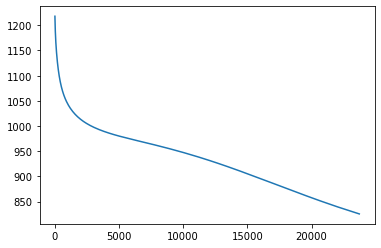

In [56]:
plot_iteration(a.cost_rate, min_it=100)

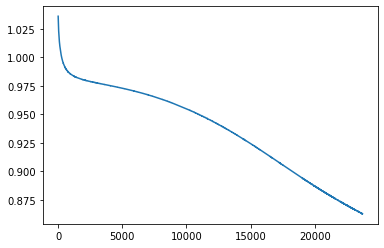

In [57]:
plot_iteration(a.rel_err, min_it=100)

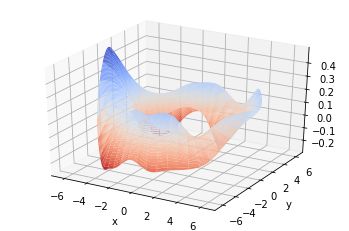

In [58]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

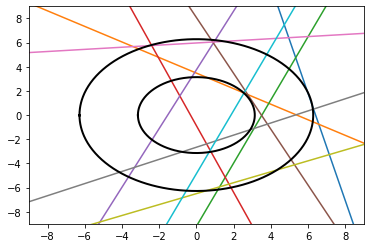

In [27]:
animate_p(p, 'test.mp4')